In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Load data**

In [2]:
df = pd.read_csv('/Users/tahiriftikhar/Documents/survey_result_full.csv')

**Clean up header and preview**

In [3]:
df = df.drop(df.index[0])
cols = ['sex', 'age', 'level'] + ['Q{}'.format(i) for i in xrange(20)]
df.columns = cols
df.head()

,sex,age,level,Q0,Q1,Q2,Q3,Q4,Q5,Q6,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
1,Femme,18,Non manager,Enormément,Pas du tout,Quelque peu,Beaucoup,Très peu,Pas mal,Pas vraiment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Femme,31,Non manager,Un peu,Un peu,Un peu,Pas vraiment,Pas du tout,Beaucoup,Pas vraiment,...,7,8,9,7,9,9,0,7,Très bonne qualité de vie : bon environnement ...,NaN
3,Homme,27,Non manager,Pas vraiment,Très peu,Pas vraiment,Pas mal,Quelque peu,Pas vraiment,Un peu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Femme,23,Non manager,Pas mal,Un peu,Pas mal,Pas vraiment,Pas vraiment,Pas mal,Très peu,...,10,9,8,9,9,8,7,9,NaN,NaN
5,Homme,43,Manager de proximité,Pas mal,Pas vraiment,Pas mal,Quelque peu,Quelque peu,Pas vraiment,Pas vraiment,...,1,2,4,1,1,5,1,2,NaN,NaN


**Replace data by numbers to compare it**

In [4]:
df_stress = df[['Q{}'.format(i) for i in xrange(0, 9)]]
values = set()
[values.update(df_stress[col].unique()) for col in df_stress]
mapping = {'Pas du tout': 1, 'Pas vraiment': 2, 'Pas vraiment\xc2\xa0': 2,'Tr\xc3\xa8s peu': 3,
           'Tr\xc3\xa8s peu\xc2\xa0': 3, 'Un peu': 4,'Un peu\xc2\xa0': 4,'Quelque peu': 5, 'Quelque peu\xc2\xa0': 5,
           'Pas mal': 6,'Beaucoup': 7, 'Beaucoup\xc2\xa0': 7, 'Enorm\xc3\xa9ment': 8}
[df_stress[col].replace(mapping, inplace=True) for col in df_stress]
df_stress['Q0_bis'] = 9 - df_stress['Q0'].values
df_stress['Q5_bis'] = 9 - df_stress['Q5'].values
df_stress.apply(pd.to_numeric)
df_stress = df_stress.drop(labels=['Q0', 'Q5'], axis=1)
df_stress.head()

df_wb = df[['Q{}'.format(i) for i in xrange(9, 18)]]
df_wb = df_wb.drop(labels='Q16', axis=1)
df_wb = df_wb.apply(pd.to_numeric)
df_wb.head()

df_tot = df_stress.join(df_wb)
df_tot.head()

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Q1,Q2,Q3,Q4,Q6,Q7,Q8,Q0_bis,Q5_bis,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q17
1,1.0,5.0,7.0,3.0,2.0,4.0,7.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,4.0,2.0,1.0,2.0,1.0,2.0,5.0,2.0,8.0,7.0,8.0,9.0,7.0,9.0,9.0,7.0
3,3.0,2.0,6.0,5.0,4.0,6.0,6.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,7.0,10.0,9.0,8.0,9.0,9.0,8.0,9.0
5,2.0,6.0,5.0,5.0,2.0,2.0,5.0,3.0,7.0,1.0,1.0,2.0,4.0,1.0,1.0,5.0,2.0


**plot correlation matrix**

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


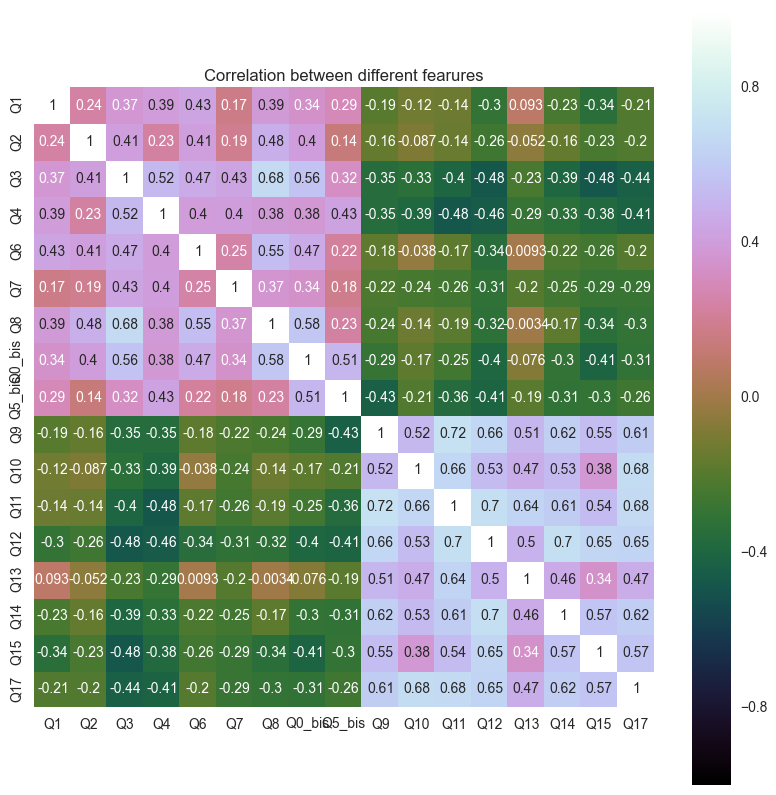

In [5]:
length = len(df_tot.columns)
correlation = df_tot.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

plt.title('Correlation between different fearures')

**print means**

In [6]:
df_tot.mean()

Q1        4.850467
Q2        3.957944
Q3        4.214953
Q4        3.672897
Q6        4.336449
Q7        3.448598
Q8        4.500000
Q0_bis    4.443925
Q5_bis    4.172897
Q9        5.403941
Q10       6.940887
Q11       6.487685
Q12       6.714286
Q13       6.940887
Q14       6.694581
Q15       6.137931
Q17       6.640394
dtype: float64

**print median**

In [7]:
df_tot.median()

Q1        5.0
Q2        4.0
Q3        4.0
Q4        4.0
Q6        4.0
Q7        3.0
Q8        4.0
Q0_bis    4.0
Q5_bis    4.0
Q9        6.0
Q10       7.0
Q11       7.0
Q12       7.0
Q13       8.0
Q14       7.0
Q15       7.0
Q17       7.0
dtype: float64

**print standard deviation**

In [8]:
df_tot.std()

Q1        2.015451
Q2        2.058558
Q3        1.773715
Q4        1.892787
Q6        1.932883
Q7        1.936715
Q8        1.738139
Q0_bis    1.720939
Q5_bis    1.816206
Q9        2.659633
Q10       2.405944
Q11       2.417673
Q12       2.179368
Q13       2.578750
Q14       2.349493
Q15       2.303826
Q17       2.171768
dtype: float64

**standardize data (mean zero and std one) and remove nan values**

In [9]:
from sklearn.preprocessing import StandardScaler, Imputer
X = df_tot.iloc[:,:].values
X_full = Imputer().fit_transform(X)
X_std = StandardScaler().fit_transform(X_full)
X_std

array([[ -2.01948164e+00,   5.35089874e-01,   1.65976736e+00, ...,
          0.00000000e+00,  -4.18469071e-16,   0.00000000e+00],
       [ -4.46050556e-01,   2.15955554e-02,  -1.32001632e+00, ...,
          1.06509510e+00,   1.34847607e+00,   1.79732288e-01],
       [ -9.70527583e-01,  -1.00539308e+00,   1.06381062e+00, ...,
          0.00000000e+00,  -4.18469071e-16,   0.00000000e+00],
       ..., 
       [ -4.46050556e-01,   1.04858419e+00,   1.06381062e+00, ...,
          1.41102343e-01,   4.06167490e-01,   1.79732288e-01],
       [ -2.01948164e+00,  -1.51888740e+00,  -1.91597306e+00, ...,
          1.52709149e+00,   1.34847607e+00,   1.17933926e+00],
       [  1.12738053e+00,   1.04858419e+00,   1.06381062e+00, ...,
         -3.20894038e-01,   8.77321778e-01,  -1.81948165e+00]])

**Print covariance matrix**

In [10]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat

array([[ 1.00421941,  0.24165052,  0.37175329,  0.39613885,  0.43298292,
         0.16831933,  0.38760093,  0.33738286,  0.29177131, -0.18834418,
        -0.11775731, -0.13631324, -0.29271274,  0.09040571, -0.22276524,
        -0.33239171, -0.19881778],
       [ 0.24165052,  1.00421941,  0.41310763,  0.23238725,  0.41237722,
         0.1916176 ,  0.48028501,  0.40323343,  0.13941306, -0.15557691,
        -0.08493131, -0.14074247, -0.25713871, -0.0500562 , -0.15873686,
        -0.22451066, -0.19859665],
       [ 0.37175329,  0.41310763,  1.00421941,  0.52246937,  0.46965608,
         0.43419716,  0.68051954,  0.5661973 ,  0.32204373, -0.3437011 ,
        -0.32037925, -0.38855401, -0.46750893, -0.22164336, -0.37843763,
        -0.46528294, -0.42264959],
       [ 0.39613885,  0.23238725,  0.52246937,  1.00421941,  0.39762096,
         0.4030724 ,  0.38549175,  0.37932121,  0.42803553, -0.34437393,
        -0.37705113, -0.47022863, -0.44664959, -0.28334572, -0.32020173,
        -0.36871019

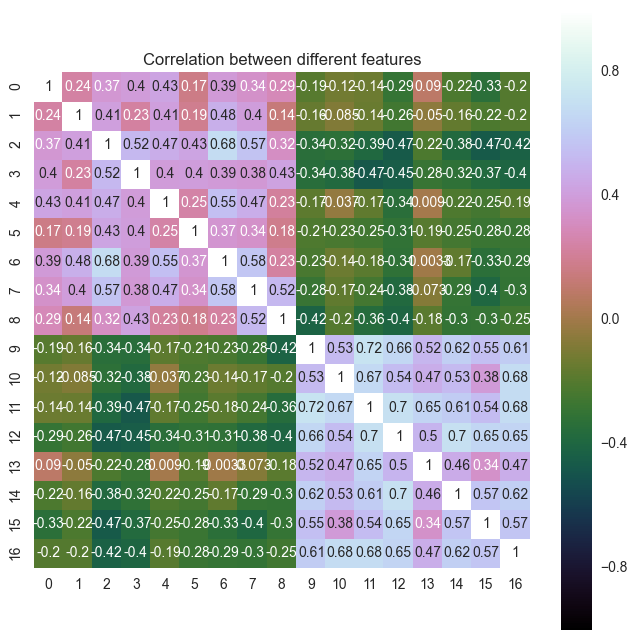

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

**print Eigenvectors**

In [12]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vecs

array([[-0.16545604, -0.27363116, -0.37873313, -0.191617  , -0.57406403,
         0.06885673, -0.01601045,  0.27229171, -0.15321061,  0.28391735,
        -0.374477  ,  0.23090852, -0.02819635, -0.10020639, -0.00492182,
        -0.01992657, -0.0035501 ],
       [-0.15367477, -0.2846534 ,  0.31439676, -0.35376596,  0.36357497,
         0.31328122,  0.01529311,  0.65270151, -0.03985075, -0.04771221,
         0.05161105, -0.06283288, -0.01637433,  0.01036955,  0.06136111,
         0.00909314,  0.00872234],
       [-0.2717206 , -0.23889139,  0.20912723,  0.08976427,  0.00207262,
        -0.03956741, -0.16680932, -0.27355859, -0.31072981, -0.02359586,
        -0.2799968 , -0.43280267,  0.17838236, -0.28066626,  0.4213578 ,
         0.24207113,  0.05930168],
       [-0.25135257, -0.11146993, -0.08657518,  0.41186433, -0.27645935,
         0.42941069,  0.07155396,  0.0467378 , -0.19502055, -0.3694579 ,
         0.27828751, -0.2105239 ,  0.10407414,  0.02845654, -0.19597987,
        -0.35688051

**print sorted Eigenvals**

In [13]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

for i in eig_pairs:
    print(i[0])

6.89394935331
2.60073541862
1.01887430013
0.926434346268
0.827385087021
0.701657542175
0.620840639983
0.540545629097
0.500051539443
0.428089559347
0.399977055689
0.364739522668
0.284865737019
0.279171924114
0.25722614705
0.230320179165
0.196865976699


In [14]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

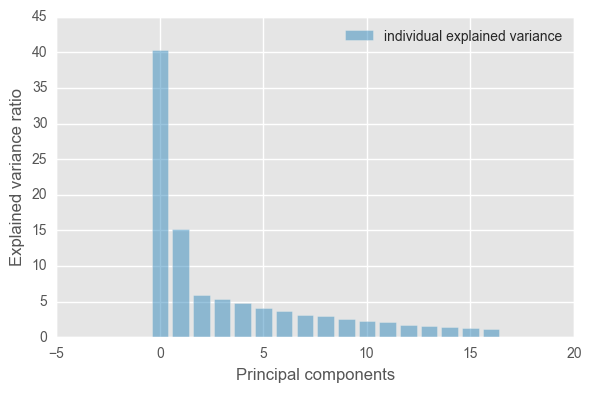

In [15]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(length), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [16]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(length,1), 
                      eig_pairs[1][1].reshape(length,1)
                    ))
print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[-0.16545604, -0.27363116],
       [-0.15367477, -0.2846534 ],
       [-0.2717206 , -0.23889139],
       [-0.25135257, -0.11146993],
       [-0.18246218, -0.35665398],
       [-0.1815769 , -0.12647223],
       [-0.21108961, -0.37854471],
       [-0.228949  , -0.30056582],
       [-0.20106396, -0.07570446],
       [ 0.28216416, -0.21365239],
       [ 0.24368975, -0.26927789],
       [ 0.29658018, -0.26626662],
       [ 0.31794343, -0.12174044],
       [ 0.20136173, -0.33536506],
       [ 0.2775279 , -0.19354887],
       [ 0.27806787, -0.04981545],
       [ 0.29222114, -0.18907774]]))


In [17]:
Y = X_std.dot(matrix_w)

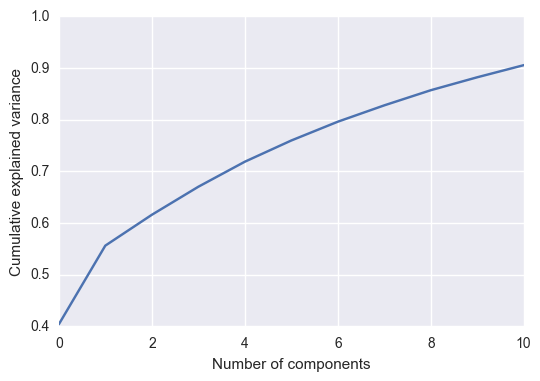

In [18]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,10,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [19]:
def cronbach_alpha(itemscores):
    '''Compute Cronbach's Alpha
    Parameters
    ----------
    itemscores : array_like
        n*p array or dataframe, n subjects and p items
    Returns
    -------
    Calpha : float
        To interpret the output the rule of George, D., & Mallery, P. (2003)
        can be used
        > .9 (Excellent),
        > .8 (Good),
        > .7 (Acceptable),
        > .6 (Questionable),
        > .5(Poor), and < .5 (Unacceptable)

    Notes
    -----
    Cronbach's Alpha is the most commonly used measure of internal consistency.
    One problem might be Cronbach's Alpha is not robust against missing data.


    References
    ----------
    Wikipedia
    '''

    itemscores = np.asarray(itemscores)
    itemscores = itemscores[~np.isnan(itemscores).any(axis = 1)]
    itemvars = itemscores.var(axis = 1, ddof = 1)
    tscores = itemscores.sum(axis = 0)
    nitems = len(itemscores)
    calpha = nitems / (nitems - 1.) * (1 - itemvars.sum() / tscores.var(ddof = 1))

    return calpha

In [20]:
df_wb_no_na = df_wb.dropna(axis=0)
np_df = df_wb_no_na.transpose()
np_df

,2,4,5,6,7,8,9,11,12,13,...,228,229,230,232,233,234,235,236,237,238
Q9,8.0,7.0,1.0,7.0,8.0,5.0,8.0,6.0,7.0,1.0,...,8.0,2.0,3.0,3.0,6.0,5.0,2.0,3.0,10.0,6.0
Q10,7.0,10.0,1.0,10.0,9.0,8.0,9.0,7.0,10.0,10.0,...,8.0,9.0,10.0,8.0,8.0,5.0,8.0,7.0,10.0,8.0
Q11,8.0,9.0,2.0,9.0,8.0,8.0,8.0,7.0,7.0,8.0,...,8.0,8.0,6.0,6.0,8.0,5.0,8.0,5.0,10.0,5.0
Q12,9.0,8.0,4.0,5.0,10.0,8.0,7.0,7.0,10.0,6.0,...,9.0,6.0,2.0,5.0,8.0,6.0,8.0,5.0,9.0,4.0
Q13,7.0,9.0,1.0,8.0,8.0,8.0,8.0,7.0,5.0,5.0,...,9.0,9.0,9.0,9.0,7.0,7.0,9.0,10.0,10.0,3.0
Q14,9.0,9.0,1.0,10.0,7.0,8.0,8.0,7.0,10.0,3.0,...,7.0,10.0,5.0,3.0,9.0,5.0,7.0,7.0,10.0,6.0
Q15,9.0,8.0,5.0,5.0,7.0,8.0,10.0,6.0,7.0,3.0,...,8.0,6.0,2.0,3.0,8.0,4.0,8.0,7.0,9.0,8.0
Q17,7.0,9.0,2.0,8.0,7.0,8.0,10.0,7.0,10.0,3.0,...,8.0,8.0,3.0,6.0,7.0,6.0,8.0,7.0,9.0,3.0


In [21]:
 cronbach_alpha(np_df)

0.91416618752324574

In [22]:
from scipy import stats
from scipy.stats import bartlett
import math as math
print stats.chi2.ppf(q = 1-0.03827, df = 7)
df_as_matrix = np_df.as_matrix()
print df_as_matrix.shape
bartlett(*[df_as_matrix[col] for col in xrange(df_as_matrix.shape[0])])

14.8278891184
(8, 203)


(14.827827747990751, 0.038270833000027385)

In [23]:
def compute_kmo(dataset):
    correlation = dataset.corr()
    corr_inv = np.linalg.inv(correlation)
    nr, nc = corr_inv.shape
    A = np.ones((nr, nc))
    for i in range(0, nr, 1):
        for j in range(i, nc, 1):
            A[i, j] = - (corr_inv[i, j]) / math.sqrt(corr_inv[i, i] * corr_inv[j, j])
            A[j, i] = A[i, j]
    correlation = np.asarray(correlation)
    kmo_num = np.sum(np.square(correlation)) - np.sum(np.square(np.diag(correlation)))
    kmo_den = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diag(A)))
    kmo_val = kmo_num / kmo_den
    return kmo_val

In [24]:
compute_kmo(df_wb)

0.91268557493769731